Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Test')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2241
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 data_dir_train,
 seed= 123,
 validation_split= 0.2,
 subset= 'training',
 image_size= (img_height, img_width),
 batch_size= batch_size
)

Found 2241 files belonging to 9 classes.
Using 1793 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
 data_dir_train,
 seed= 123,
 validation_split= 0.2,
 subset= 'validation',
 image_size= (img_height, img_width),
 batch_size= batch_size
)

Found 2241 files belonging to 9 classes.
Using 448 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

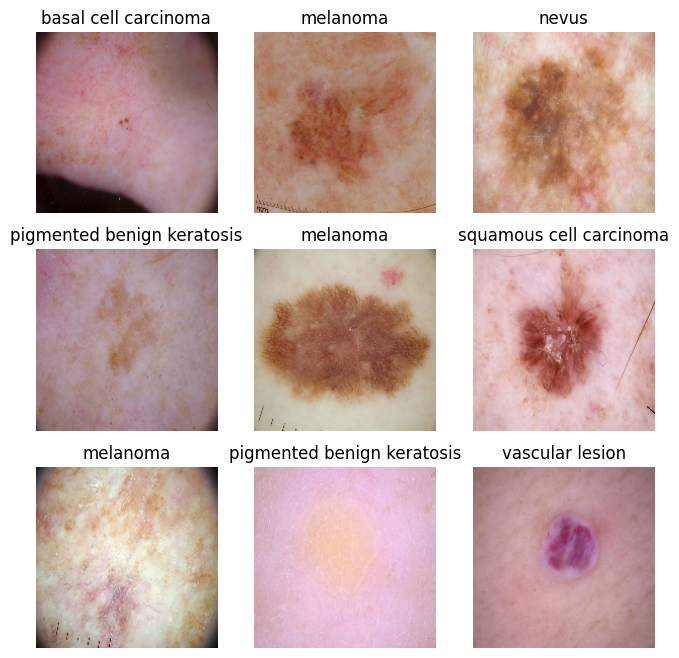

In [12]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize = (8,8))
for images, labels in train_ds.take(1):
  for i in range (9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
### Your code goes here

num_classes = 9

model = Sequential([
 layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
# first conv layer
 layers.Conv2D(16,3, padding= 'same', activation='relu'),
 layers.MaxPooling2D(),
# Second conv layer
 layers.Conv2D(32,3, padding= 'same', activation='relu'),
 layers.MaxPooling2D(),
# Third conv layer
 layers.Conv2D(64,3, padding= 'same', activation='relu'),
 layers.MaxPooling2D(),
# flatten and put a fully connected layer
 layers.Flatten(),
 layers.Dense(128, activation='relu'), # fully connected

 layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 414s 2s/step - loss: 1.9939 - accuracy: 0.2566 - val_loss: 1.8975 - val_accuracy: 0.2857
Epoch 2/20
57/57 [==============================] - 1s 21ms/step - loss: 1.7315 - accuracy: 0.3876 - val_loss: 1.6492 - val_accuracy: 0.3906
Epoch 3/20
57/57 [==============================] - 1s 20ms/step - loss: 1.5076 - accuracy: 0.4584 - val_loss: 1.4515 - val_accuracy: 0.5089
Epoch 4/20
57/57 [==============================] - 1s 19ms/step - loss: 1.3773 - accuracy: 0.5220 - val_loss: 1.5187 - val_accuracy: 0.4420
Epoch 5/20
57/57 [==============================] - 1s 19ms/step - loss: 1.3178 - accuracy: 0.5298 - val_loss: 1.4065 - val_accuracy: 0.4911
Epoch 6/20
57/57 [==============================] - 1s 19ms/step - loss: 1.1852 - accuracy: 0.5817 - val_loss: 1.3815 - val_accuracy: 0.5379
Epoch 7/20
57/57 [==============================] - 1s 20ms/step - loss: 1.1058 - accuracy: 0.6102 - val_loss: 1.5334 - val_accuracy: 0.5045
Epoch 8/20
57

### Visualizing training results

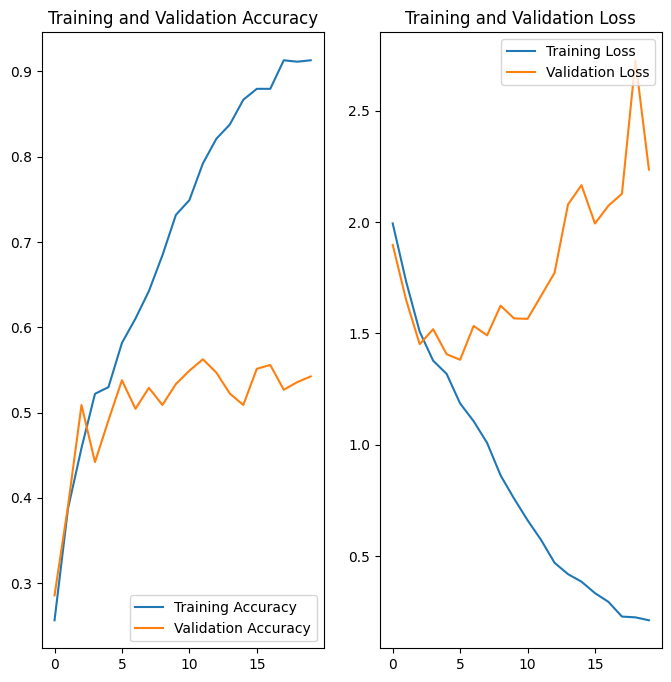

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##We can clearly see that the Model is Overfitting cause the Accuracy of training is 90% where as the validation accuracy is only 54%. It clearly shows that the Model is overfitting.

## In order to fix the Overfitting we will introduce a dropout layer and check how it effects the model

## We will also do some Data Augmentation in which we will tweeks the existing images like flipping, rotating and zooming in

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.


data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

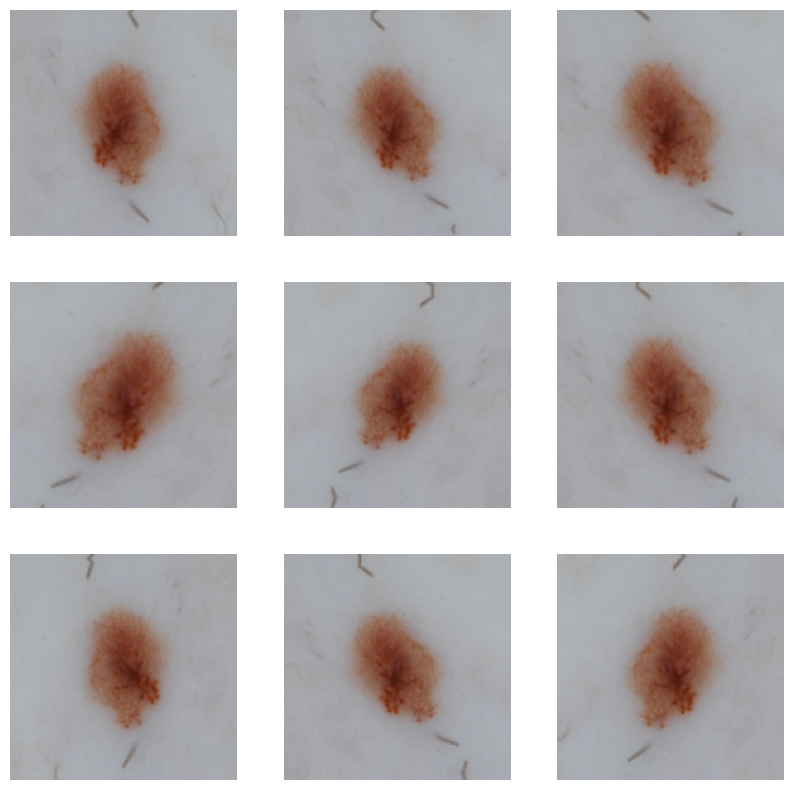

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.


plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')


### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding = 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes)
])

### Compiling the model

In [22]:


model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 5s 37ms/step - loss: 1.9563 - accuracy: 0.2755 - val_loss: 1.7809 - val_accuracy: 0.3348
Epoch 2/20
57/57 [==============================] - 2s 30ms/step - loss: 1.6359 - accuracy: 0.4016 - val_loss: 1.7746 - val_accuracy: 0.3482
Epoch 3/20
57/57 [==============================] - 2s 29ms/step - loss: 1.5392 - accuracy: 0.4389 - val_loss: 1.5038 - val_accuracy: 0.4688
Epoch 4/20
57/57 [==============================] - 2s 29ms/step - loss: 1.4545 - accuracy: 0.4757 - val_loss: 1.4000 - val_accuracy: 0.5067
Epoch 5/20
57/57 [==============================] - 2s 29ms/step - loss: 1.4059 - accuracy: 0.4880 - val_loss: 1.4191 - val_accuracy: 0.5246
Epoch 6/20
57/57 [==============================] - 2s 31ms/step - loss: 1.3778 - accuracy: 0.5031 - val_loss: 1.4004 - val_accuracy: 0.5223
Epoch 7/20
57/57 [==============================] - 2s 31ms/step - loss: 1.3043 - accuracy: 0.5404 - val_loss: 1.4043 - val_accuracy: 0.5134
Epoch 8/20
57

### Visualizing the results

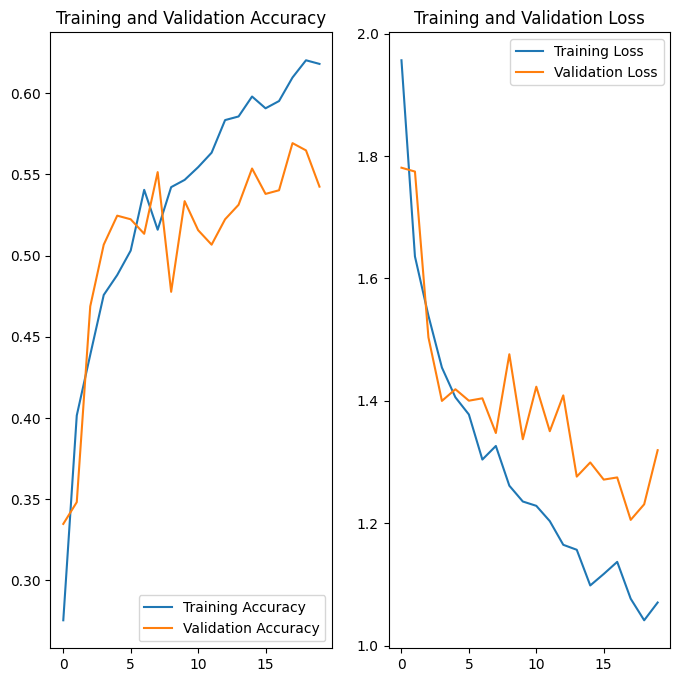

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## After doing data augmentation and introducing the dropout layer one change that we see in the results is that the Overfitting is taken care of. Earlier we could see a huge difference in the graph where the Training accuracy and the Validation accuracy were not in sync. Now at least the overfitting is taken care of but the performance of the model is not at par. The accuracy is at approximately 57% - 60% which we think we can improve by making some changes.

##One reason that we normally can see is the bias in the information. Where we might have more content of few categories and very minimal content of few other categories and in those cases the model can not perform well.

##we will fix the issue by using augmentor and adding more content so that we have ample training data for all the classes.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
## Your code goes here.

from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train,'*','*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*','*.jpg'))]
print(len(lesion_list))

2241


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('/content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/melanoma/ISIC_0000139.jpg', 'melanoma'), ('/content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/melanoma/ISIC_0000141.jpg', 'melanoma')]


In [29]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns= ['Path', 'Label'])
original_df.head()

,Path,Label
0,/content/drive/MyDrive/Starter_code_Assignment...,melanoma
1,/content/drive/MyDrive/Starter_code_Assignment...,melanoma
2,/content/drive/MyDrive/Starter_code_Assignment...,melanoma
3,/content/drive/MyDrive/Starter_code_Assignment...,melanoma
4,/content/drive/MyDrive/Starter_code_Assignment...,melanoma


In [30]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    464
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

In [31]:
original_df[['Label']].value_counts(normalize=True)

Label                     
pigmented benign keratosis    0.207050
melanoma                      0.195448
basal cell carcinoma          0.167782
nevus                         0.159304
squamous cell carcinoma       0.080768
vascular lesion               0.062026
actinic keratosis             0.050870
dermatofibroma                0.042392
seborrheic keratosis          0.034360
dtype: float64

## We can see a clear case of imbalance as the last 2 categories dont have enough representation and that would definitely effect the performance of the model. In order for good accuracy we would need to add more samples. We can do that using augmentor.

In [26]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D85BFFEB790>: 100%|██████████| 500/500 [00:16<00:00, 30.52 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D8595B37910>: 100%|██████████| 500/500 [00:20<00:00, 24.97 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D85BFFC71F0>: 100%|██████████| 500/500 [00:19<00:00, 26.08 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D85E81F76D0>: 100%|██████████| 500/500 [01:28<00:00,  5.67 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D85E8CE6140>: 100%|██████████| 500/500 [01:10<00:00,  7.11 Samples/s]


Initialised with 464 image(s) found.
Output directory set to /content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D8595B73400>: 100%|██████████| 500/500 [00:17<00:00, 28.71 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D85BFFD8B20>: 100%|██████████| 500/500 [00:40<00:00, 12.35 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D85EA6CFDC0>: 100%|██████████| 500/500 [00:16<00:00, 29.87 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D85E8F270D0>: 100%|██████████| 500/500 [00:20<00:00, 24.77 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [33]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [34]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/melanoma/output/melanoma_original_ISIC_0000549.jpg_6883f0fb-4988-4e99-a15b-c19c3aa083f5.jpg',
 '/content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/melanoma/output/melanoma_original_ISIC_0010653.jpg_043ae2bd-054b-4f34-8bf4-21840d9c0885.jpg',
 '/content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/melanoma/output/melanoma_original_ISIC_0000548.jpg_d8a403f8-bab0-4784-9663-7a934098e891.jpg',
 '/content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/melanoma/output/melanoma_original_ISIC_0010714.jpg_3aaec4bf-f372-41e5-a65f-b090871ee674.jpg',
 '/content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/melanoma/output/melanoma_original_ISIC_0010591.jpg_8b99f15e-cdc3-4f38-b697-648924f3ef4b.jpg',
 '/content/drive/MyDrive/Starter_code_Assignment_CNN_Skin_Cancer/Train/melanoma/output/melanoma_original_ISIC_0010778.jpg_fdfe78f4-8581-470f-a7ea-1004b5e1268e.jpg',
 '/content

In [35]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [37]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-38-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [39]:
new_df['Label'].value_counts()

pigmented benign keratosis    964
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [40]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [41]:
## data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6741 files belonging to 9 classes.
Using 5393 files for training.


#### **Todo:** Create a validation dataset

In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6741 files belonging to 9 classes.
Using 1348 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [43]:
## your code goes here

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [44]:
## your code goes here

model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [46]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 45s 242ms/step - loss: 2.0011 - accuracy: 0.2474 - val_loss: 1.6182 - val_accuracy: 0.3731
Epoch 2/50
169/169 [==============================] - 40s 229ms/step - loss: 1.5034 - accuracy: 0.4235 - val_loss: 1.3599 - val_accuracy: 0.4792
Epoch 3/50
169/169 [==============================] - 38s 221ms/step - loss: 1.3821 - accuracy: 0.4645 - val_loss: 1.3734 - val_accuracy: 0.4763
Epoch 4/50
169/169 [==============================] - 38s 220ms/step - loss: 1.3155 - accuracy: 0.5021 - val_loss: 1.2225 - val_accuracy: 0.5341
Epoch 5/50
169/169 [==============================] - 41s 234ms/step - loss: 1.2599 - accuracy: 0.5142 - val_loss: 1.1950 - val_accuracy: 0.5378
Epoch 6/50
169/169 [==============================] - 41s 235ms/step - loss: 1.1869 - accuracy: 0.5490 - val_loss: 1.2688 - val_accuracy: 0.5215
Epoch 7/50
169/169 [==============================] - 41s 235ms/step - loss: 1.1999 - accuracy: 0.5364 - val_loss: 1.1662 - val_ac

#### **Todo:**  Visualize the model results

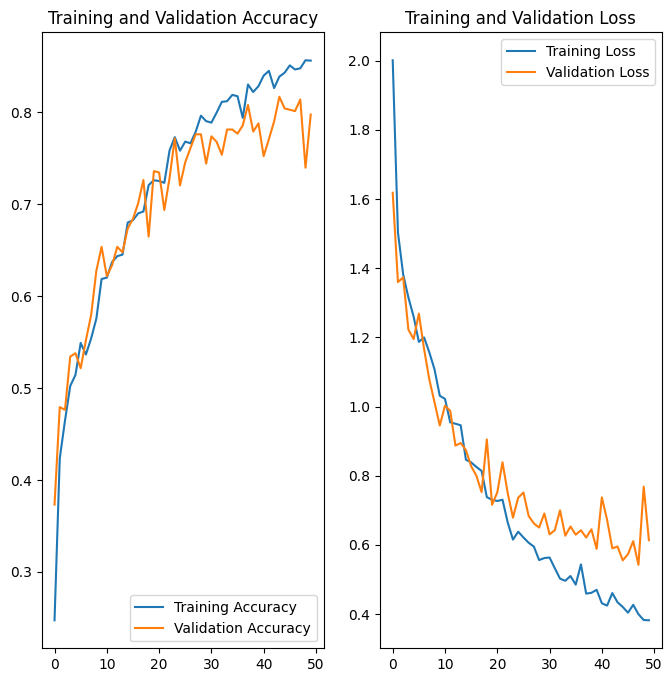

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## As we can see from the above results that now the accuracy of the model is really good at about 80%. our Model is also not overfitting. We see that the methods that we used like adding more images using the Augmentor to increase the size of the dataset really helped.

## There were also points when both the Training and Validation Accuracy were almost identical. Even now after 50 epochs the accuracy of both training and validation is acceptable.